In [21]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("data.csv")

In [11]:
data["id"] = data.index + 1

In [14]:
del data["country"]

In [15]:
data.head()

,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,id
0,44.9,10.0,1610,553,9.44,7.58,90.2,5.82,56.2,1
1,48.6,28.0,9930,4090,4.49,6.55,16.6,1.65,76.3,2
2,31.4,38.4,12900,4460,16.10,4.17,27.3,2.89,76.5,3
3,42.9,62.3,5900,3530,22.40,2.85,119.0,6.16,60.1,4
4,58.9,45.5,19100,12200,1.44,6.03,10.3,2.13,76.8,5


In [16]:
data.describe()

,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,id
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.00000
mean,46.890215,41.108976,17144.688623,12964.155689,7.781832,6.815689,38.270060,2.947964,70.555689,84.00000
std,24.209589,27.412010,19278.067698,18328.704809,10.570704,2.746837,40.328931,1.513848,8.893172,48.35287
min,0.065900,0.109000,609.000000,231.000000,-4.210000,1.810000,2.600000,1.150000,32.100000,1.00000
25%,30.200000,23.800000,3355.000000,1330.000000,1.810000,4.920000,8.250000,1.795000,65.300000,42.50000
50%,43.300000,35.000000,9960.000000,4660.000000,5.390000,6.320000,19.300000,2.410000,73.100000,84.00000
75%,58.750000,51.350000,22800.000000,14050.000000,10.750000,8.600000,62.100000,3.880000,76.800000,125.50000
max,174.000000,200.000000,125000.000000,105000.000000,104.000000,17.900000,208.000000,7.490000,82.800000,167.00000


In [17]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.871954e-16,2.383323e-16,-7.512288e-17,2.127373e-17,8.376533e-17,5.218713e-16,-2.659217e-17,3.124580e-16,3.616535e-16,3.589943e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-1.939940e+00,-1.500192e+00,-8.603259e-01,-6.968005e-01,-1.137852e+00,-1.827827e+00,-8.871383e-01,-1.191250e+00,-4.337186e+00,-1.721710e+00
25%,-6.914785e-01,-6.333367e-01,-7.174558e-01,-6.366596e-01,-5.666409e-01,-6.922106e-01,-7.466190e-01,-7.639023e-01,-5.927576e-01,-8.608551e-01
50%,-1.487432e-01,-2.235279e-01,-3.738080e-01,-4.544309e-01,-2.269504e-01,-1.810007e-01,-4.717981e-01,-3.564309e-01,2.869576e-01,0.000000e+00
75%,4.913530e-01,3.747198e-01,2.942370e-01,5.942100e-02,2.816364e-01,6.515412e-01,5.926666e-01,6.175252e-01,7.042584e-01,8.608551e-01
max,5.266181e+00,5.813835e+00,5.611542e+00,5.036507e+00,9.129718e+00,4.047436e+00,4.221297e+00,3.009349e+00,1.380962e+00,1.721710e+00


In [22]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [23]:
kmeans.inertia_

1216.561275481345

/home/bimsara/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/bimsara/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/bimsara/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/bimsara/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/bimsara/anaconda3/lib/python3.8/site-packa

Text(0, 0.5, 'Inertia')

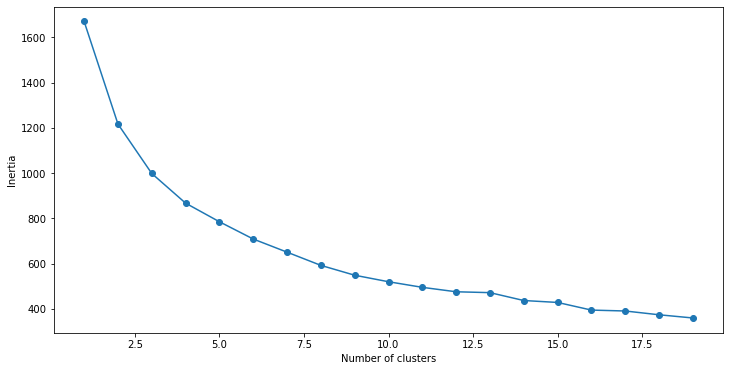

In [26]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [28]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

/home/bimsara/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [29]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    85
1    47
2    35
Name: cluster, dtype: int64

In [34]:
print(frame['cluster'])

0      1
1      0
2      0
3      1
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Name: cluster, Length: 167, dtype: int32


In [1]:
print('ujja')

ujja
